# Unit 5 - Financial Planning


### Format data with `json.dumps`

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 3.5

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url = requests.get(btc_url)
btc_content = btc_url.json()
# Fetch current ETH price
eth_url = requests.get(eth_url)
eth_content = eth_url.json()

# Compute current value of my crpto
my_btc_value = btc_content['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_content['data']['1027']['quotes']['USD']['price'] * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15438.89
The current value of your 3.5 ETH is $1426.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
api = tradeapi.REST(alpaca_key, alpaca_secret, api_version = 'v2')

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stocks_df = api.get_barset(tickers, timeframe, start = current_date).df

# Preview DataFrame
stocks_df.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.880  3591541  348.96   
2020-10-19 00:00:00-04:00  117.81  117.8700  117.72  117.787  4231106  348.62   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2829309  343.33   
2020-10-22 00:00:00-04:00  117.51  117.5400  117.30  117.310  3933253  342.96   

                                                             
                             high     low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.10  347.25  62796942  
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  54462156  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45033179

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(stocks_df['AGG']['close'][0])
spy_close_price = float(stocks_df['SPY']['close'][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_bitcoin = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = {"amount":[total_bitcoin, total_shares]}
df_savings = pd.DataFrame(data, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,16865.803
shares,40938.500


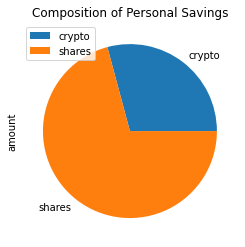

In [12]:
# Plot savings pie chart
pie_savings = df_savings.plot(kind = 'pie', y = 'amount', title = 'Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings['amount'].sum()

difference = emergency_fund - savings
# Validate saving health
if savings > emergency_fund:
      print(f'Congratulations on having enough money for this fund!')
elif savings == emergency_fund:
     print(f'Congratulations on reaching this financial goal!')
elif savings < emergency_fund:
    print(f'You are {difference} away from reaching your goal')

Congratulations on having enough money for this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(tickers, timeframe, start = start_date , end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0  202.83   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0  202.98   

                                                                
                             high       low   close     volume  
2015-10-16 00:00:00-04:00  203.29  201.9200  203.14   79323870  
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
   num_simulation = 500,
    num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994857,0.992276,0.981818,1.006260,1.000506,1.005778,0.999611,1.008650,0.996621,0.988759,...,1.009334,0.991275,1.004670,0.999393,1.017666,0.990853,0.999710,0.994279,1.005046,1.002198
2,0.982718,0.995902,0.985074,1.001466,1.000754,0.997761,0.991317,0.997948,0.990627,0.980291,...,1.009839,0.994527,1.012700,1.006140,1.008670,0.990583,0.982696,0.998679,1.009041,1.005633
3,0.968660,0.985304,0.975658,1.009592,1.002426,0.998933,0.979694,0.999226,0.991853,0.981220,...,1.008697,0.989640,1.006632,1.009938,1.016153,0.985505,0.985985,0.998610,1.014724,1.014937
4,0.986484,0.993184,0.977672,1.003968,1.003618,1.000636,0.986736,1.009953,1.004165,0.987777,...,1.006970,0.996449,1.010285,1.005129,1.018862,0.981068,0.987903,1.002500,1.017930,1.011518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.383357,5.007977,12.824412,4.998844,7.192078,7.023585,8.018482,6.633636,24.004631,13.116986,...,8.132591,4.201434,11.012519,7.526319,15.645881,5.044998,6.766668,9.185541,18.833548,3.464379
7557,4.438739,5.043809,12.840541,5.011835,7.250395,7.022021,8.071021,6.533940,23.935353,12.949956,...,8.254486,4.206399,11.053269,7.575323,15.560265,5.002528,6.792576,9.139079,18.975907,3.465788
7558,4.452090,5.045181,12.822926,5.013489,7.228967,6.959147,8.041889,6.457052,23.942281,12.992561,...,8.265582,4.228329,10.949511,7.573422,15.723296,4.991894,6.824406,9.155006,19.246547,3.538382
7559,4.493263,5.084446,12.919714,5.032922,7.191503,7.008380,8.129794,6.467126,23.905198,12.896513,...,8.303395,4.193667,11.009165,7.532476,15.939562,5.041195,6.711350,9.149928,19.288846,3.539721


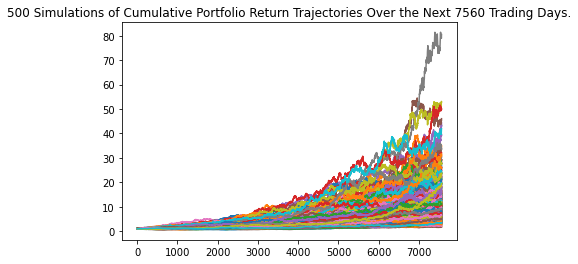

In [22]:
# Plot simulation outcomes
MC_plot = MC_stocks.plot_simulation()

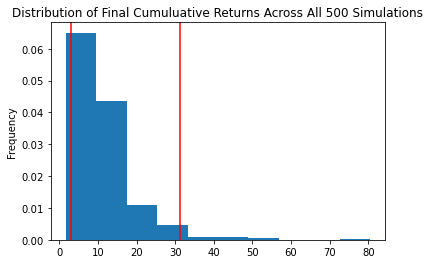

In [23]:
# Plot probability distribution and confidence intervals
MC_dist = MC_stocks.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.328502
std               8.097599
min               1.699200
25%               6.312580
50%               9.388492
75%              13.514572
max              80.456850
95% CI Lower      3.065718
95% CI Upper     31.281402
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * tbl[8],2)
ci_upper = round(initial_investment * tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61314.37 and $625628.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * tbl[8],2)
ci_upper = round(initial_investment * tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91971.55 and $938442.06


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
   num_simulation = 500,
    num_trading_days = 252*5)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995363,1.008514,1.007708,0.996566,1.001680,1.009071,1.008999,1.000262,1.002824,0.990617,...,0.990121,1.002265,1.001709,1.007588,1.001564,0.993350,1.006097,0.996353,0.986124,0.995626
2,0.991885,1.008824,0.994087,0.995680,1.006588,1.015825,1.007506,0.998550,1.004887,0.999132,...,0.980054,1.003481,1.013145,1.008506,1.001750,0.989131,1.013445,0.987552,0.976443,0.989771
3,0.990473,1.007759,0.991735,1.006710,0.994906,1.017227,1.011938,0.993478,1.018649,0.985120,...,0.978457,0.990419,1.006203,1.013529,1.012089,0.987178,1.015602,0.991474,0.977740,0.991551
4,0.981689,1.001703,0.995904,1.007397,1.016113,1.019450,1.010329,0.993657,1.026967,0.985652,...,0.976451,0.985227,0.991499,1.013714,1.012785,0.991994,1.019713,0.996353,0.976353,0.988544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.948071,0.927517,1.325758,0.787855,1.116763,0.792112,1.011828,1.666951,1.259177,1.062135,...,1.412466,1.051429,1.322670,1.364490,1.113310,1.493678,1.559886,1.564172,1.291060,1.335417
1257,0.949820,0.927807,1.311113,0.790143,1.129318,0.801166,1.018875,1.661765,1.273766,1.053084,...,1.411370,1.062582,1.322540,1.353996,1.112364,1.492103,1.524107,1.563283,1.278295,1.316484
1258,0.955411,0.916494,1.302664,0.796487,1.130047,0.802182,1.008288,1.642080,1.267511,1.042518,...,1.420702,1.064966,1.327663,1.342904,1.097515,1.490910,1.522823,1.560349,1.268702,1.319612
1259,0.951855,0.915265,1.302837,0.796805,1.121673,0.808841,1.009886,1.642736,1.262604,1.041346,...,1.413833,1.056132,1.329072,1.340076,1.098451,1.507215,1.506082,1.563110,1.279035,1.313016


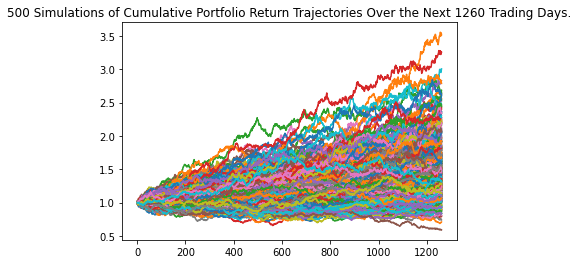

In [29]:
# Plot simulation outcomes
MC_plot_1 = MC_stocks_5.plot_simulation()

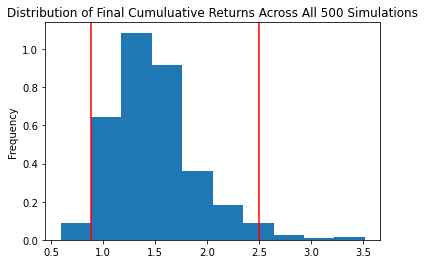

In [30]:
# Plot probability distribution and confidence intervals
MC_dist_1 = MC_stocks_5.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl1 = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
print(tbl1)

count           500.000000
mean              1.496038
std               0.409900
min               0.590525
25%               1.211834
50%               1.442676
75%               1.709043
max               3.518271
95% CI Lower      0.882428
95% CI Upper      2.497942
Name: 1260, dtype: float64


In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(initial_investment * tbl1[8],2)
ci_upper_five = round(initial_investment * tbl1[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17648.55 and $49958.84


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
   num_simulation = 500,
    num_trading_days = 252*10)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999179,0.994597,0.998546,1.007801,1.001523,1.003124,1.000721,0.995565,0.993043,0.984857,...,0.992893,1.007046,1.004920,1.010096,0.992114,0.993519,1.004991,0.997346,0.997746,1.000152
2,1.002686,1.001228,0.992092,1.017635,0.991981,1.003438,1.001876,0.991726,0.989265,0.995887,...,0.995230,0.997712,1.016685,1.015111,0.995578,1.000558,1.012996,1.010316,0.996968,0.995846
3,0.994616,0.998109,0.984844,1.015167,0.995049,1.002620,0.996126,0.973810,0.992499,0.986183,...,1.004013,1.006497,1.016340,1.008771,0.995053,1.001922,1.002604,1.017628,0.985160,0.993033
4,0.994101,0.998149,0.972689,1.000360,0.999400,0.986225,0.988073,0.962488,0.982799,0.987506,...,1.018516,1.002356,1.023500,1.006965,0.999492,1.016451,1.007992,1.024175,0.985419,0.995230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.459472,3.097936,3.260707,1.631678,2.391995,2.263983,3.145970,2.241862,2.457862,4.237250,...,1.081615,3.868733,1.096531,1.449626,2.157505,2.023567,1.468079,1.546543,1.531412,2.332989
2517,0.460105,3.111968,3.242050,1.621928,2.390139,2.285918,3.075973,2.239051,2.460128,4.226271,...,1.100736,3.878026,1.107930,1.449354,2.180315,2.030509,1.455463,1.556821,1.514235,2.328237
2518,0.458241,3.128756,3.228067,1.627425,2.404616,2.279939,3.055568,2.242268,2.455270,4.203895,...,1.101066,3.830216,1.115134,1.438881,2.152901,2.040599,1.463167,1.560187,1.517691,2.344756
2519,0.459690,3.138091,3.248460,1.621268,2.431073,2.305628,3.026181,2.243074,2.459802,4.171089,...,1.102567,3.802354,1.117275,1.433022,2.140581,2.040324,1.453658,1.570074,1.516406,2.363044


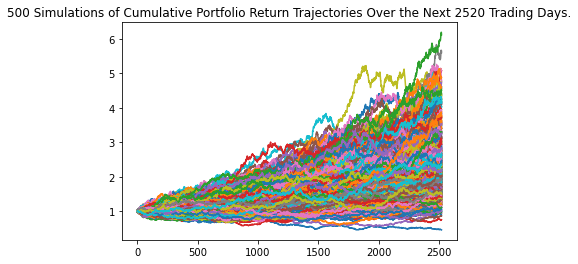

In [35]:
# Plot simulation outcomes
plot2 = MC_stocks_10.plot_simulation()

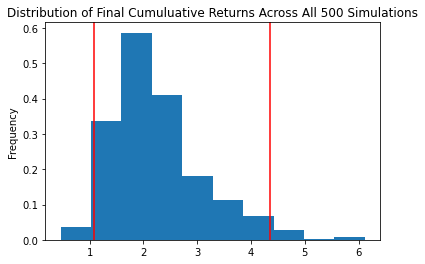

In [36]:
# Plot probability distribution and confidence intervals
dist2 = MC_stocks_10.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_stocks_10.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              2.257295
std               0.849111
min               0.457897
25%               1.664363
50%               2.094600
75%               2.631137
max               6.115739
95% CI Lower      1.077966
95% CI Upper      4.347928
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten =  round(initial_investment * tbl2[8],2)
ci_upper_ten = round(initial_investment * tbl2[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21559.31 and $86958.55
